In [1]:
# Code created by: Fernando Lopez-Velasco

import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

% matplotlib inline

# 1. Loading Data.

### <span style="color:#8b0000"> <i>Note</i>: download and load into your favorite analytical tool the trip data for September 2015 </span>

In [2]:
""" Uncomment this sentences to download the file """
#import os
#os.system('wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')

' Uncomment this sentences to download the file '

### <span style="color:#8b0000"> Showing the number of rows and columns. </span>

In [3]:
data = pd.read_csv('green_tripdata_2015-09.csv', parse_dates=True)
print(data.shape)

(1494926, 21)


<b>Number of rows:</b> 1494926
<br>
<b>Numer of columns:</b> 21

# 2. Cleaning Data.

Before plotting something, I will explore data and I'll solve some issues as:

* Remove columns/features I don't need for this excercise.
* In case of <i>null</i> values, fix it.
* In case of <i>fake</i> values, fix it.
* In case of need to add or change some columns/featues, do it.

So let's do it!

In [4]:
data.head()

VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0         2  2015-09-01 00:02:34   2015-09-01 00:02:38                  N   
1         2  2015-09-01 00:04:20   2015-09-01 00:04:24                  N   
2         2  2015-09-01 00:01:50   2015-09-01 00:04:24                  N   
3         2  2015-09-01 00:02:36   2015-09-01 00:06:42                  N   
4         2  2015-09-01 00:00:14   2015-09-01 00:04:20                  N   

   RateCodeID  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0           5        -73.979485        40.684956         -73.979431   
1           5        -74.010796        40.912216         -74.010780   
2           1        -73.921410        40.766708         -73.914413   
3           1        -73.921387        40.766678         -73.931427   
4           1        -73.955482        40.714046         -73.944412   

   Dropoff_latitude  Passenger_count     ...      Fare_amount  Extra  MTA_tax  \
0         40.685020                1     ...              7.8    0.0      0.0   
1         40.912212                1     ...             45.0    0.0      0.0   
2         40.764687                1     ...              4.0    0.5      0.5   
3         40.771584                1     ...              5.0    0.5      0.5   
4         40.714729                1     ...              5.0    0.5      0.5   

   Tip_amount  Tolls_amount  Ehail_fee  improvement_surcharge  Total_amount  \
0        1.95           0.0        NaN                    0.0          9.75   
1        0.00           0.0        NaN                    0.0         45.00   
2        0.50           0.0        NaN                    0.3          5.80   
3        0.00           0.0        NaN                    0.3          6.30   
4        0.00           0.0        NaN                    0.3          6.30   

   Payment_type  Trip_type   
0             1         2.0  
1             1         2.0  
2             1         1.0  
3             2         1.0  
4             2         1.0  

[5 rows x 21 columns]

## 2.1 Removing Features.

In this part, I will remove some columns that I won't need for this porpuse, which are:

* VendorID
* Store_and_fwd_flag
* RateCodeID
* Extra
* MTA_tax
* improvement_surcharge
* Tip_amount
* Tolls_amount
* Trip_type
* Ehail_fee

In [5]:
data = data.drop(['VendorID','Store_and_fwd_flag',
                  'RateCodeID','Extra','MTA_tax',
                  'improvement_surcharge','Tip_amount',
                 'Tolls_amount','Trip_type ','Ehail_fee'], axis='columns')

In [6]:
data.head()

lpep_pickup_datetime Lpep_dropoff_datetime  Pickup_longitude  \
0  2015-09-01 00:02:34   2015-09-01 00:02:38        -73.979485   
1  2015-09-01 00:04:20   2015-09-01 00:04:24        -74.010796   
2  2015-09-01 00:01:50   2015-09-01 00:04:24        -73.921410   
3  2015-09-01 00:02:36   2015-09-01 00:06:42        -73.921387   
4  2015-09-01 00:00:14   2015-09-01 00:04:20        -73.955482   

   Pickup_latitude  Dropoff_longitude  Dropoff_latitude  Passenger_count  \
0        40.684956         -73.979431         40.685020                1   
1        40.912216         -74.010780         40.912212                1   
2        40.766708         -73.914413         40.764687                1   
3        40.766678         -73.931427         40.771584                1   
4        40.714046         -73.944412         40.714729                1   

   Trip_distance  Fare_amount  Total_amount  Payment_type  
0           0.00          7.8          9.75             1  
1           0.00         45.0         45.00             1  
2           0.59          4.0          5.80             1  
3           0.74          5.0          6.30             2  
4           0.61          5.0          6.30             2

Now let's see some statistics in the dataset.

In [7]:
data.describe()

Pickup_longitude  Pickup_latitude  Dropoff_longitude  Dropoff_latitude  \
count      1.494926e+06     1.494926e+06       1.494926e+06      1.494926e+06   
mean      -7.383084e+01     4.069114e+01      -7.383728e+01      4.069291e+01   
std        2.776082e+00     1.530882e+00       2.677911e+00      1.476698e+00   
min       -8.331908e+01     0.000000e+00      -8.342784e+01      0.000000e+00   
25%       -7.395961e+01     4.069895e+01      -7.396782e+01      4.069878e+01   
50%       -7.394536e+01     4.074674e+01      -7.394504e+01      4.074728e+01   
75%       -7.391748e+01     4.080255e+01      -7.391013e+01      4.079015e+01   
max        0.000000e+00     4.317726e+01       0.000000e+00      4.279934e+01   

       Passenger_count  Trip_distance   Fare_amount  Total_amount  \
count     1.494926e+06   1.494926e+06  1.494926e+06  1.494926e+06   
mean      1.370598e+00   2.968141e+00  1.254320e+01  1.503215e+01   
std       1.039426e+00   3.076621e+00  1.008278e+01  1.155316e+01   
min       0.000000e+00   0.000000e+00 -4.750000e+02 -4.750000e+02   
25%       1.000000e+00   1.100000e+00  6.500000e+00  8.160000e+00   
50%       1.000000e+00   1.980000e+00  9.500000e+00  1.176000e+01   
75%       1.000000e+00   3.740000e+00  1.550000e+01  1.830000e+01   
max       9.000000e+00   6.031000e+02  5.805000e+02  5.813000e+02   

       Payment_type  
count  1.494926e+06  
mean   1.540559e+00  
std    5.232935e-01  
min    1.000000e+00  
25%    1.000000e+00  
50%    2.000000e+00  
75%    2.000000e+00  
max    5.000000e+00

Taking a look at columns: <b><i>Fare_amount</i></b> and <b><i>Total_amount</i></b>, we can see that the minimun value is -475 aprox, this is so weird because there can not be negative fares, so I'll proceed to drop it.

In [8]:
k = 0
for i in data.Fare_amount:
    if i < 0:
        k += 1
print("Number of fake fares: ", k)

Number of fake fares:  2417


In [9]:
data = data[data.Fare_amount>=0]
data = data[data.Total_amount>=0]

## 2.2 Removing <i>null</i> values.

Now let's proceed to evaluate if there are some <b><i>null</i></b> values.

In [10]:
data.isnull().sum()

lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Total_amount             0
Payment_type             0
dtype: int64

Fortunately, there are not any <b><i>null</i></b> value.

## 2.3 Adding New Featues.

The dataset that we have right now is composed with the next features:

* Pickup datetime
* Dropoff datetime
* Pickup longitude
* Pickup latitude
* Dropoff longitude
* Dropoff latitude
* Passenger count
* Trip distance
* Fare amount
* Total amount
* Payment type

One important thing we can observe is that we have coordinates about pickup and dropoff. So let's add some new features which could help us for this excercise. These features are:

* Change in longitude
* Change in latitude

In [11]:
data['lon_change'] = abs(data.Dropoff_longitude - data.Pickup_longitude)
data['lat_change'] = abs(data.Dropoff_latitude - data.Pickup_latitude)

# 3. Visualization

The porpuse of this part is to visualize some interesting things found inside data. So First I will change the data type for <b>lpep_pickup_datetime</b> and <b>Lpep_dropoff_datetime</b> which ones have a <b>object</b> data type and I would like to have them as a <b>datatime</b> type.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492509 entries, 0 to 1494925
Data columns (total 13 columns):
lpep_pickup_datetime     1492509 non-null object
Lpep_dropoff_datetime    1492509 non-null object
Pickup_longitude         1492509 non-null float64
Pickup_latitude          1492509 non-null float64
Dropoff_longitude        1492509 non-null float64
Dropoff_latitude         1492509 non-null float64
Passenger_count          1492509 non-null int64
Trip_distance            1492509 non-null float64
Fare_amount              1492509 non-null float64
Total_amount             1492509 non-null float64
Payment_type             1492509 non-null int64
lon_change               1492509 non-null float64
lat_change               1492509 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 159.4+ MB


In [13]:
data = data.drop(['Lpep_dropoff_datetime'], axis=1)

In [14]:
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

In [15]:
data = data.set_index(['lpep_pickup_datetime'])

## 3.1 Histograms

### 3.1.1 Fares

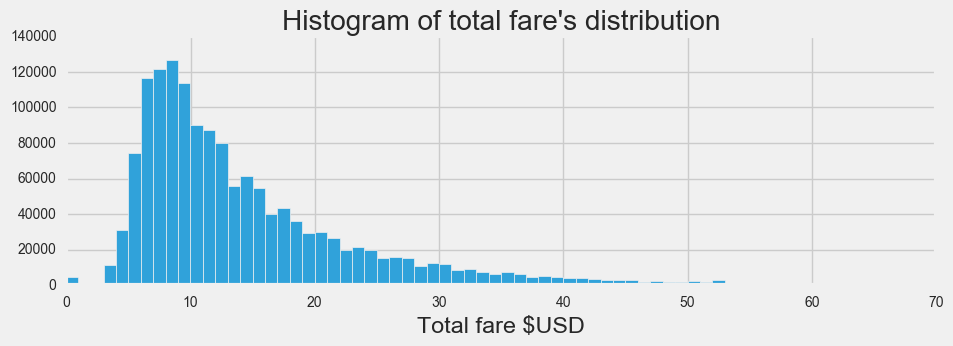

In [16]:
plt.style.use('fivethirtyeight')
data[data.Total_amount<70].Total_amount.hist(bins=70, figsize=(10,3))
plt.xlabel('Total fare $USD')
plt.title("Histogram of total fare's distribution");

### 3.1.2 Distance

### <span style="color:#8b0000"> Plot histogram of Trip Distance </span>

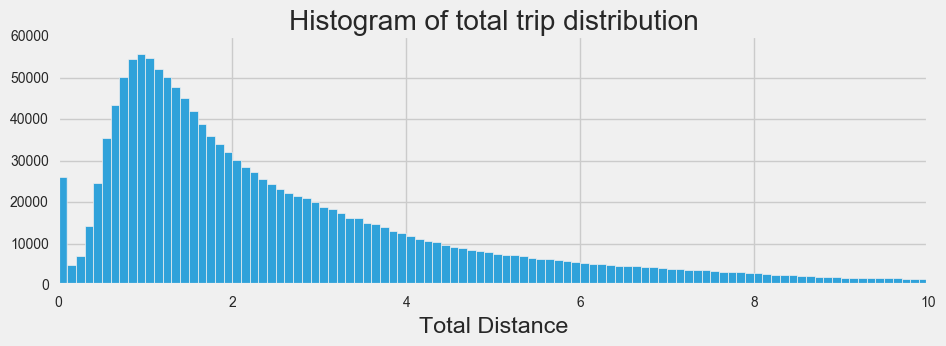

In [17]:
data[data.Trip_distance<10].Trip_distance.hist(bins=100, figsize=(10,3))
plt.xlabel('Total Distance')
plt.title("Histogram of total trip distribution");

In [18]:
data.shape

(1492509, 11)

In [19]:
print(data.Trip_distance.mean())
print(data.Trip_distance.std())

2.9725099614139032
3.077168577595341


<b>Distance average: </b>2.9725099614139032<br>
<b>Distance standard deviation: </b>3.077168577595341

* The distribution of trip distances can be respresented as a <b>normal distribution</b>.
* Most of the passenger just used to <b>travel around 1 mile</b>.
* As the distance increase, the distance traveled by the passengers <b>decrease</b>.
* There is an <b>anomaly</b> in the zero value.

### 3.1.3 Passenger count

/Users/Fer/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


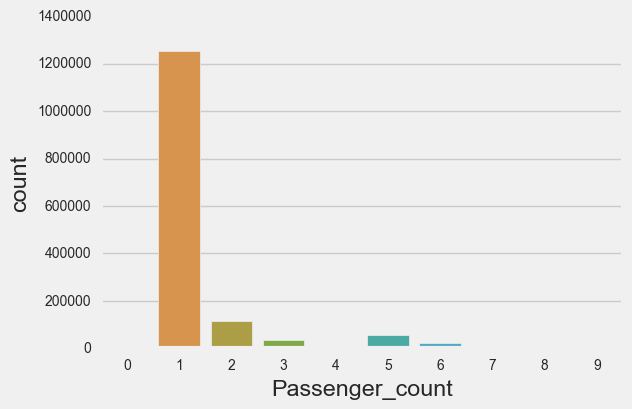

In [20]:
plot_sns = sns.countplot(data.Passenger_count, label='Passengers')

In [21]:
data.Passenger_count.mean()

1.3705418191783099

We can see some special things:
* The taxi used to transport just only one passenger
* In some special cases, it has transported more than 5 passengers

### 3.1.4 Payment type

/Users/Fer/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Payment with type 1:  783494
Payment with type 2:  701284
Payment with type 3:  4160
Payment with type 4:  3497
Payment with type 5:  74


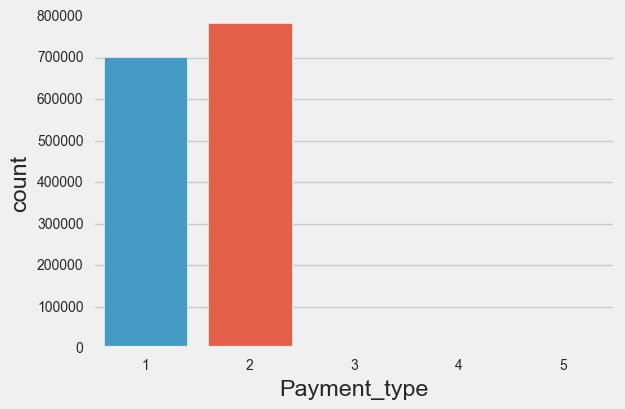

In [22]:
plot_sns = sns.countplot(data.Payment_type, label='Number of payments')
type1,type2,type3,type4,type5 = data.Payment_type.value_counts()
print("Payment with type 1: ", type1)
print("Payment with type 2: ", type2)
print("Payment with type 3: ", type3)
print("Payment with type 4: ", type4)
print("Payment with type 5: ", type5)

There are 6 types of payments, so we can see:
* Type 1 and type 2 are the most used, which are <b>credit card</b> and <b>cash</b> respectively.

### 3.2 Time Series

The idea of this part is to show you the behavior of some features versus time. So I will analyze the most important features and show how is the relation related to time.

In [23]:
# Create a new dataframe to be used in time series plotting
data_plot = data[['Trip_distance','Passenger_count', 'Total_amount']]

# Get different indexes: day, hour, minute.
index_day = data_plot.index.day
index_hour = data_plot.index.hour
index_minute = data_plot.index.minute

# Get the column's name from data_plot
distance, NumPassenger, Total = data_plot.columns

In [24]:
# Defining a function to plot time series
def plotting(item, index):
    
    plt.style.use('fivethirtyeight')
    if item=='Trip_distance':
        ylabel = 'Distance'
    elif item=='Passenger_count':
        ylabel = 'Passengers'
    elif item=='Total_amount':
        ylabel = 'Fare $USD'
        
    to_plot = data_plot[item].groupby(index).mean()
    hline = to_plot.max()
    vline = to_plot.idxmax()
    ax = to_plot.plot(linewidth=0.8,figsize=(15,3))
    ax.axvline(vline, color='red', linewidth=0.9,linestyle='--')
    ax.axhline(hline, color='green', linewidth=0.9, linestyle='--')
    ax.set_xlabel('Time', fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    print("Max in time: ", vline)
    print("Max in distance: ",hline)
    plt.show()

### <span style="color:#8b0000"> Reporting mean and median trip distance grouped by hour of day </span>

In [25]:
# Grouping the distance by hour
trip = data_plot[distance].groupby(index_hour).mean()

In [26]:
print("Mean: ", trip.mean())
print("Median: ",trip.median())

Mean:  3.078735970132048
Median:  3.0025224152263936


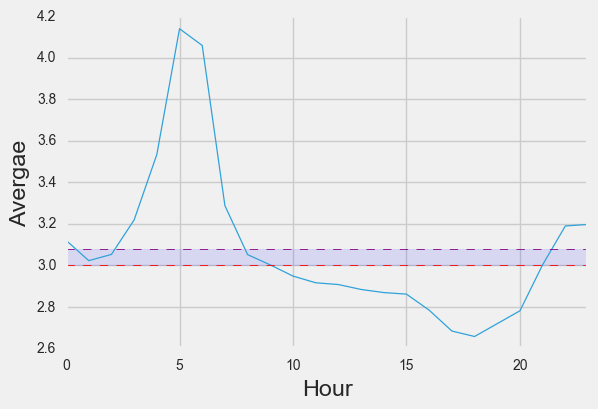

In [27]:
ax = trip.plot(figsize=(6,4), linewidth=0.9)
ax.set_xlabel('Hour')
ax.axhline(trip.median(), color='red', linewidth=0.6, linestyle='--')
ax.axhline(trip.mean(), color='purple', linewidth=0.6, linestyle='--')
ax.axhspan(trip.mean(),trip.median(), color='blue', alpha=0.1)
ax.set_ylabel('Avergae')

In this plot we can visualize the behavior of distance in realtion with every our. We can observe that the most used is by 5am.

### 3.2.1 Behavior of <i>Distances / Day</i>.

In this part I will show you how the behavior is of features:

* Distance
* Number of passenger
* Total amount

in relation with: <b>day, hour, minute</b>.

Max in time:  7
Max in distance:  3.20044303195


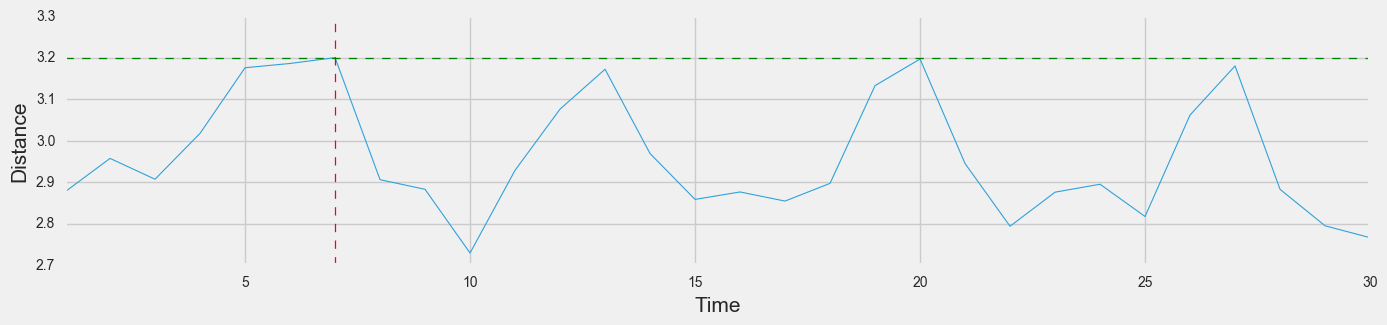

In [29]:
plotting(distance, index_day)

We can see some interesting things:

* People used to travel distances longer every 7 days aprox.
* At the begining and at the end of month, people used to not to travel long distances.

### 3.2.2 Behavior of <i>Distances / Hour.

Max in time:  5
Max in distance:  4.1403623058


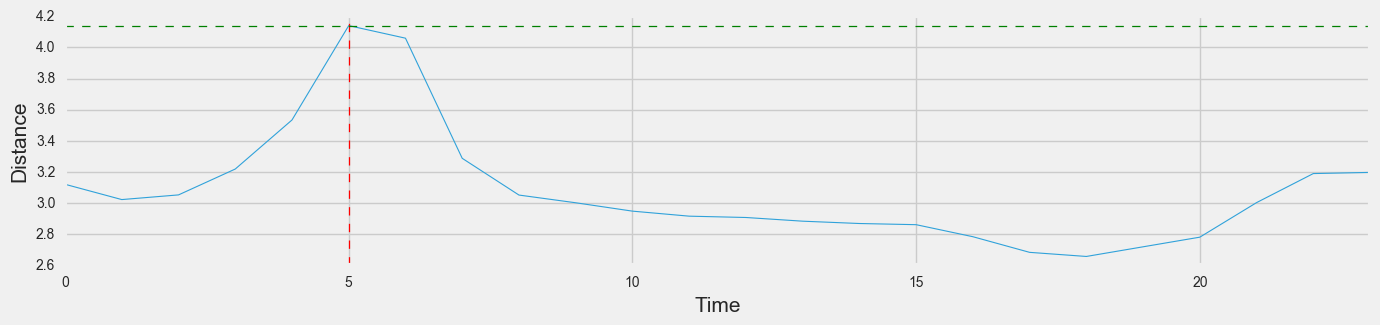

In [30]:
plotting(distance, index_hour)

We can see some interesting things:

* People used to travel longer distances when they take a taxi at 5am.
* People don't used to travel long distances when it's midday.

### 3.2.3 Behavior of <i>Distances / Minute</i>.

Max in time:  13
Max in distance:  3.0437028968


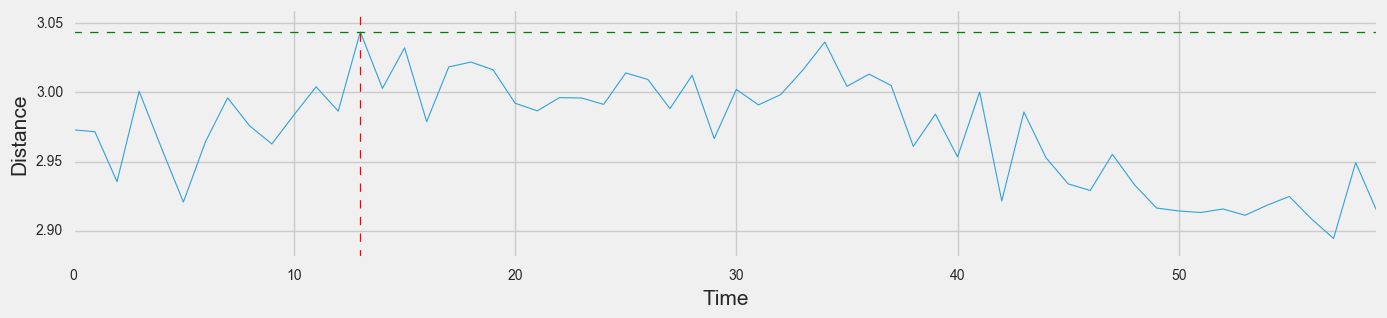

In [31]:
plotting(distance, index_minute)

The behavior at minute level is a little bit regular.

### 3.2.4 Behavior of <i>Number of Passengers / Day</i>.

Max in time:  6
Max in distance:  1.42093352192


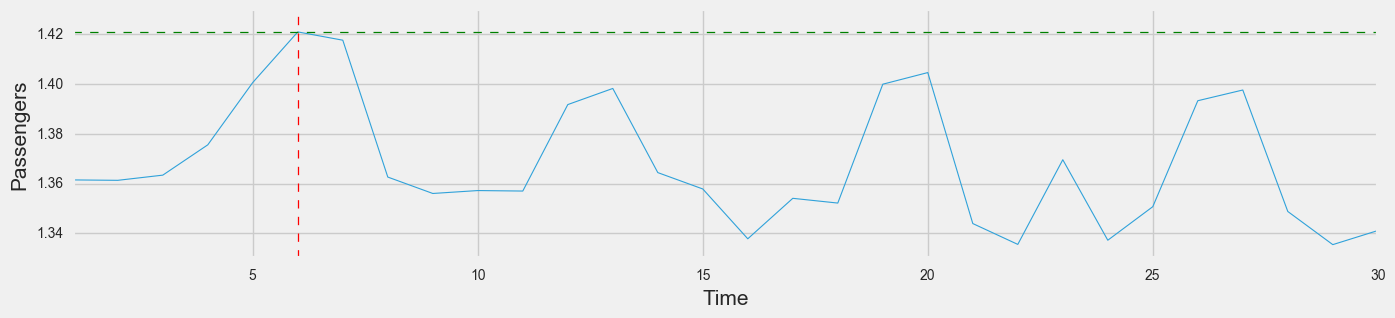

In [32]:
plotting(NumPassenger, index_day)

We can see some interesting things:

* People used to use taxi with more than one person like every 7 days.

### 3.2.5 Behavior of <i>Number of Passengers / Hour</i>.

Max in time:  3
Max in distance:  1.43514472101


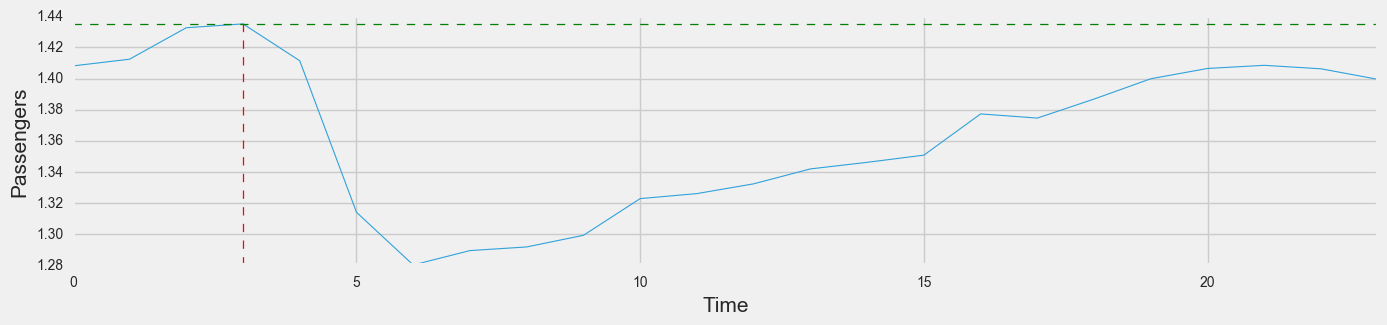

In [33]:
plotting(NumPassenger, index_hour)

We can see some interesting things:

* People used to use taxi with more than one people in a range of 12:00am and 4:00am, for security maybe.

### 3.2.6 Behavior of <i>Number of Passengers / Minute</i>.

Max in time:  35
Max in distance:  1.38631099752


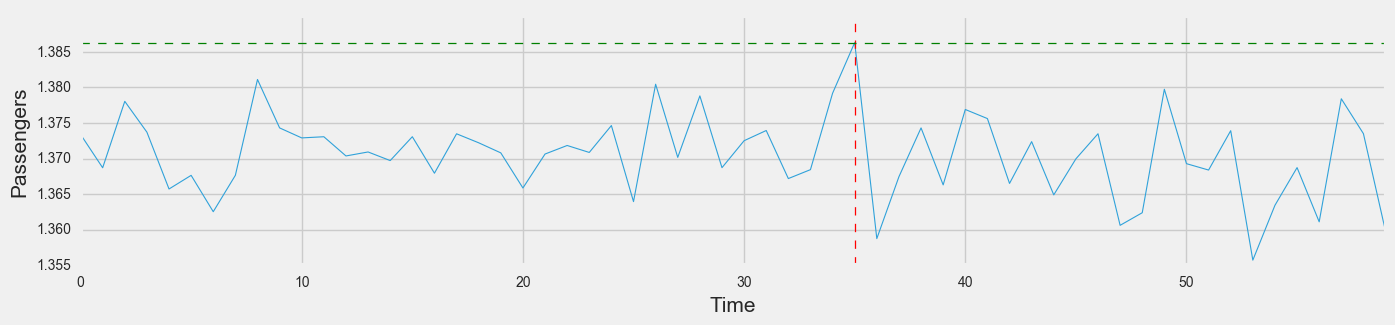

In [34]:
plotting(NumPassenger, index_minute)

The behavior is a little bit regular.

### 3.2.7 Behavior of <i>Total Amount / Day</i>.

Max in time:  11
Max in distance:  15.6027908169


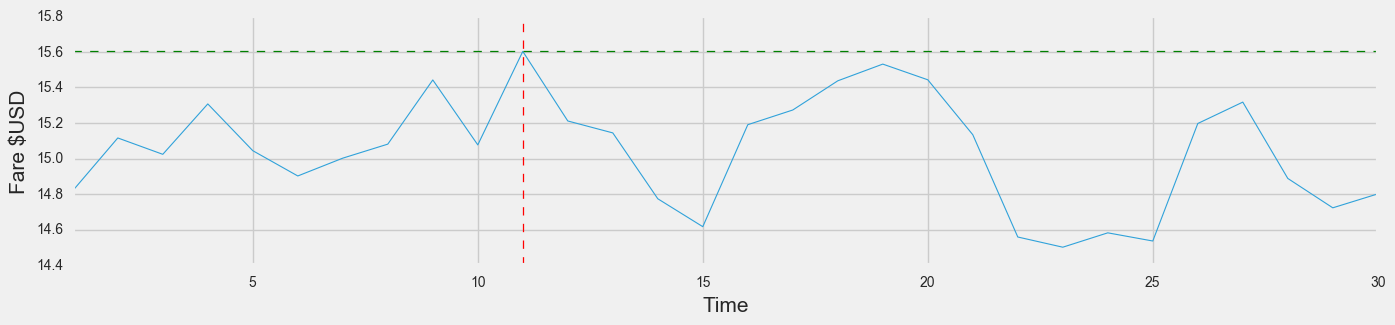

In [35]:
plotting(Total, index_day)

People used to pay a little bit less when is fortnight.

### 3.2.8 Behavior of <i>Total Amount / Hour</i>.

Max in time:  5
Max in distance:  17.7595411193


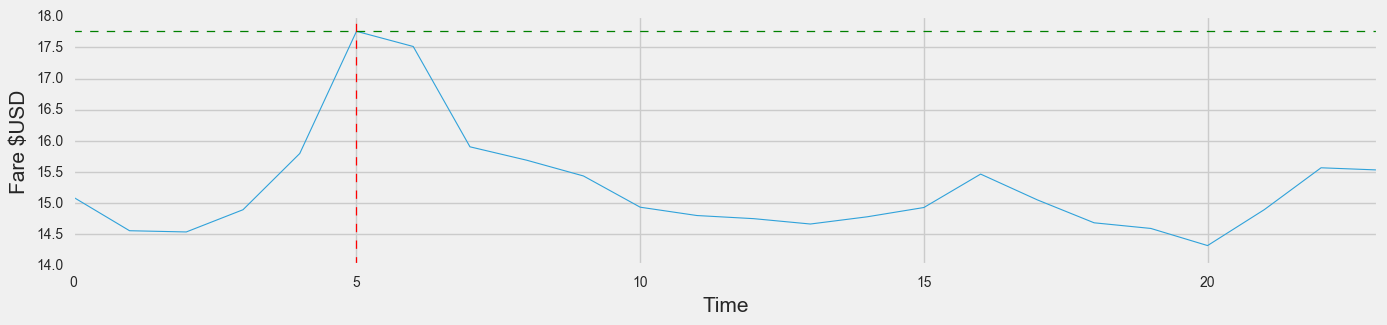

In [36]:
plotting(Total, index_hour)

We can see some interesting things:

* People used to pay more when take a taxi at 5am.

### 3.2.9 Behavior of <i>Total Amount / Minute</i>.

Max in time:  34
Max in distance:  15.3223709231


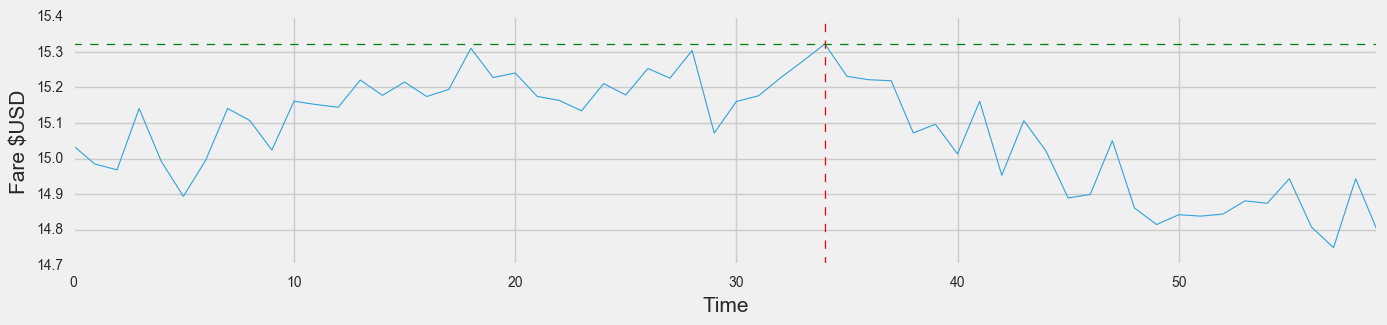

In [37]:
plotting(Total, index_minute)

The behavior is a little bit regular.

### 3.3 Correlations

In this part I will show you the correlations making use of <b>pearson</b> coefficient. This is because I assume that features have a linear relation.

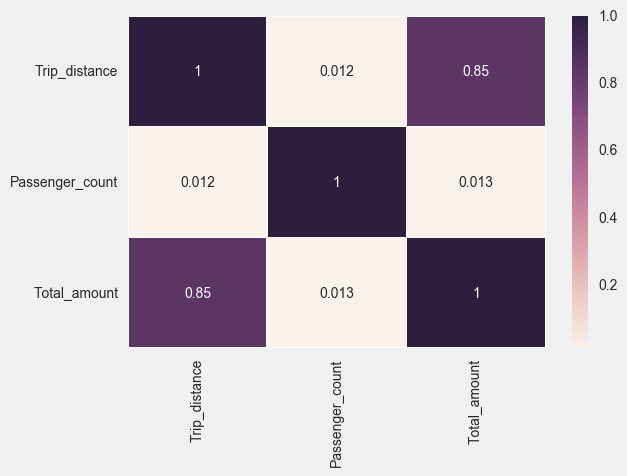

In [38]:
corr_ = data_plot.corr(method='pearson')
sns.heatmap(corr_,annot=True,linewidths=0.4,annot_kws={"size": 10})
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

We can see some interesting things:

* As expected, the distance and total amount are strongly correlated.
* The number of passengers have no relation with the total fare amount.

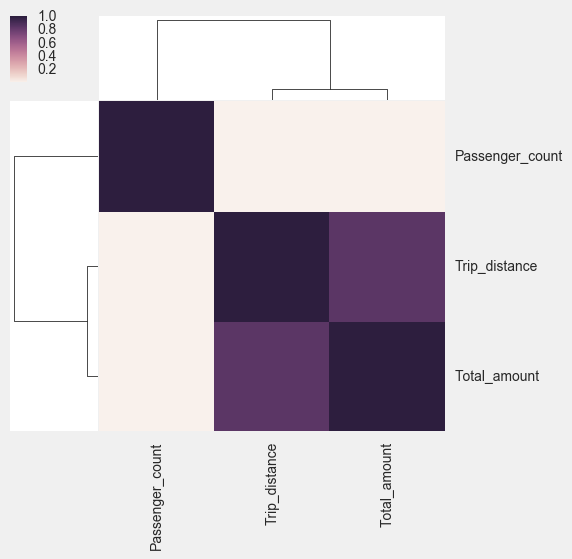

In [39]:
corr_ = data_plot.corr(method='pearson')
fig = sns.clustermap(corr_, row_cluster=True,col_cluster=True,figsize=(5, 5))
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

The same behavior.

### <span style="color:#8b0000">Showing the distributios by Airport in NY </span>

In [44]:
# Ideas and pieces of code for this functiones were taken from: Albert van Breemen

jfk = (-73.7822222222, 40.6441666667) #JFK Airport
nyc = (-74.0063889, 40.7141667) # NYC Airport
ewr = (-74.175, 40.69) # Newark Liberty International Airport
lgr = (-73.87, 40.77) # LaGuardia Airport

# Function to calculate distances given coordenates
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

# Function to plot relations between distances and total fare amount
def plot_location_fare(loc, name, range=1):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    idx = (distance(data.Pickup_latitude, data.Pickup_longitude, loc[1], loc[0]) < range)
    data[idx].Fare_amount.hist(bins=100, ax=axs[0])
    axs[0].set_xlabel('Total Fare', fontsize=8)
    axs[0].set_title('Pickup location \n{}'.format(name), fontsize=8)

    idx = (distance(data.Dropoff_latitude, data.Dropoff_longitude, loc[1], loc[0]) < range)
    data[idx].Fare_amount.hist(bins=100, ax=axs[1])
    axs[1].set_xlabel('Total Fare', fontsize=8)
    axs[1].set_title('Dropoff location \n{}'.format(name), fontsize=8);

<b>JFK Airport</b>

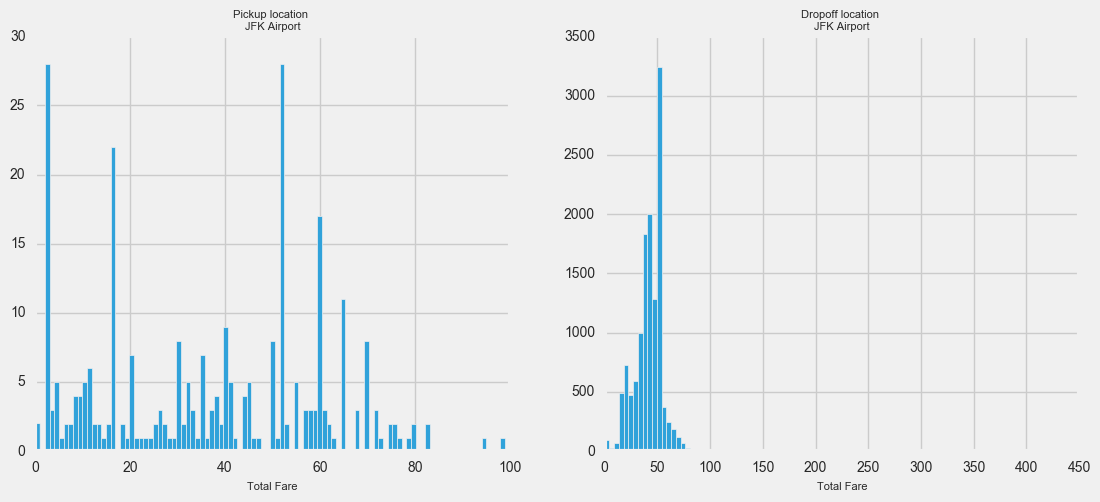

In [45]:
plot_location_fare(jfk, 'JFK Airport')

We can observe some interesting things:

* People used to pay more when are picked up from JFK Airport.
* People used to pay less when they dropped off to JFK Airport.

<b>Newark Airport</b>

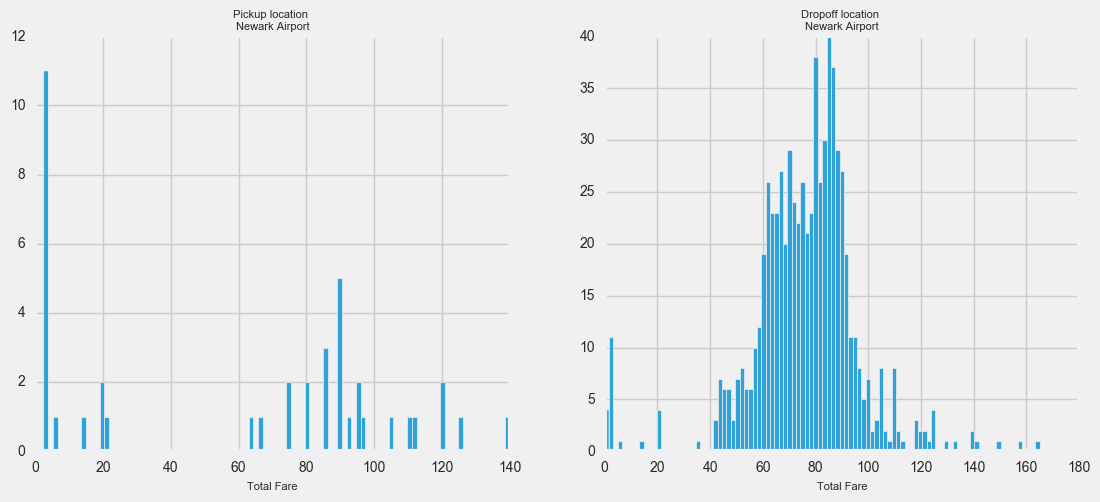

In [46]:
plot_location_fare(ewr, 'Newark Airport')

We can observe some interesting things:

* There is an anomaly because the histogram from left shows us that so many people did not pay.
* People used to pay more when are picked up from Newark Airport.
* People used to pay $80usd aprox when they are dropped of to Newark Airport.

<b>La Guardia Airport</b>

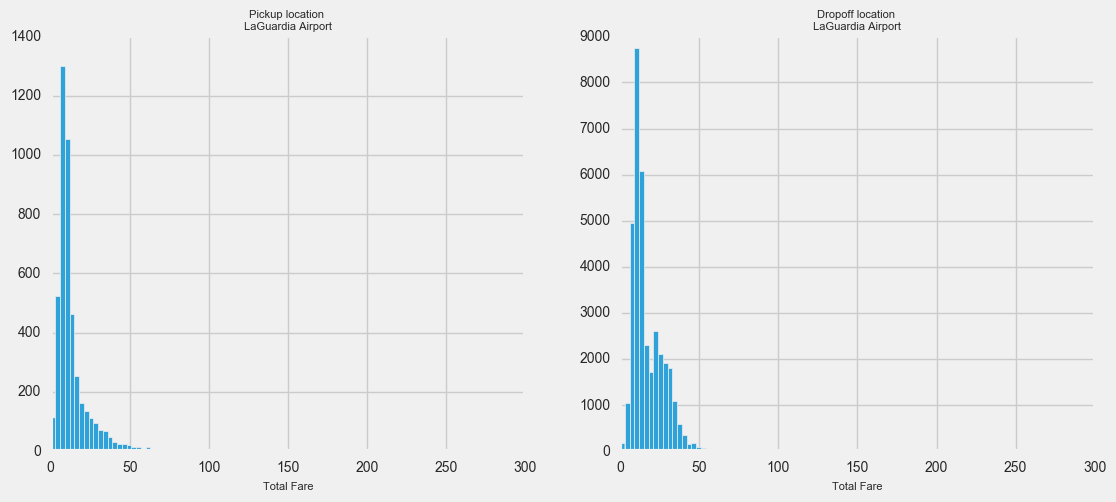

In [47]:
plot_location_fare(lgr, 'LaGuardia Airport')

People used to pay like the same, when they are picked up and dropped off. Although just a little bit more when they are dropped off.

### <span style="color:#8b0000"> Making something interesting: Create a variable <i>Tip</i> and building a model to predict it </span>

In [48]:
# Set tip as 13% from total amount
tip = 0.13

In [49]:
data['tip'] = data['Total_amount'] + data['Total_amount'] * tip
data.head()

Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
lpep_pickup_datetime                                                         
2015-09-01 00:02:34         -73.979485        40.684956         -73.979431   
2015-09-01 00:04:20         -74.010796        40.912216         -74.010780   
2015-09-01 00:01:50         -73.921410        40.766708         -73.914413   
2015-09-01 00:02:36         -73.921387        40.766678         -73.931427   
2015-09-01 00:00:14         -73.955482        40.714046         -73.944412   

                      Dropoff_latitude  Passenger_count  Trip_distance  \
lpep_pickup_datetime                                                     
2015-09-01 00:02:34          40.685020                1           0.00   
2015-09-01 00:04:20          40.912212                1           0.00   
2015-09-01 00:01:50          40.764687                1           0.59   
2015-09-01 00:02:36          40.771584                1           0.74   
2015-09-01 00:00:14          40.714729                1           0.61   

                      Fare_amount  Total_amount  Payment_type  lon_change  \
lpep_pickup_datetime                                                        
2015-09-01 00:02:34           7.8          9.75             1    0.000053   
2015-09-01 00:04:20          45.0         45.00             1    0.000015   
2015-09-01 00:01:50           4.0          5.80             1    0.006996   
2015-09-01 00:02:36           5.0          6.30             2    0.010040   
2015-09-01 00:00:14           5.0          6.30             2    0.011070   

                      lat_change      tip  
lpep_pickup_datetime                       
2015-09-01 00:02:34     0.000065  11.0175  
2015-09-01 00:04:20     0.000004  50.8500  
2015-09-01 00:01:50     0.002022   6.5540  
2015-09-01 00:02:36     0.004906   7.1190  
2015-09-01 00:00:14     0.000683   7.1190

### <span style="color:#8b0000"> Building a predictive model based on XGBoost
 </span>

In this case I will use <b>XGBoost</b> for the evidence of great results on tasks related.

In [50]:
# Define my frame for this excercise
data_model = data[['Trip_distance','Fare_amount','Total_amount','tip']]

I use just <i>Trip_distance, Fare_amount, Total_amount</i> because I assume this are the most important features to predict <i>tip</i>.

In [51]:
# Split target and corpus data
Y = data_model.tip
X = data_model.drop(['tip'], axis=1)

In [52]:
X.head()

Trip_distance  Fare_amount  Total_amount
lpep_pickup_datetime                                          
2015-09-01 00:02:34            0.00          7.8          9.75
2015-09-01 00:04:20            0.00         45.0         45.00
2015-09-01 00:01:50            0.59          4.0          5.80
2015-09-01 00:02:36            0.74          5.0          6.30
2015-09-01 00:00:14            0.61          5.0          6.30

In [53]:
# Load libraries and stuff

import xgboost as xgb # xgboost regressor
from sklearn import preprocessing # to use min_max_scaler
from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import mean_absolute_error, mean_squared_error # metrics

<b>Scaling data<b>

In [54]:
# Initialize the object and fit
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)

<b>Splitting data for training and test </b>

In [55]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

Defining some functions to:
* <b> Define model </b>
* <b> Calculate metrics </b>
* <b> Plot performance </b>

In [58]:
# to plot performance
def plot_performance(plot_name, loss_mae, loss_mse):
    steps = np.arange(10, 100, 20)
    plt.title(plot_name)
    plt.plot(steps, loss_mae, linewidth=0.9, label="MAE")
    plt.plot(steps, loss_mse, linewidth=0.9, label="MSE")
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Number of estimators")
    plt.show()

# to calculate metrics
def def_metrics(Ypred):
    mae = mean_absolute_error(Ytest, Ypred)
    mse = mean_squared_error(Ytest, Ypred)

    return mae, mse

# to generate the model
def def_xgboost(estimators):
    xgb_ = xgb.XGBRegressor(objective ='reg:linear', learning_rate=0.1, max_depth=3, n_estimators=estimators)
    xgb_.fit(Xtrain,Ytrain)
    Ypred = xgb_.predict(Xtest)
    
    return def_metrics(Ypred)

Create a cycle to evaluate the <b>best number of estimators</b> needed to obtain the best regressor.

Number of estimators: 10
MAE:  5.80636988187
MSE:  57.4272743504
Number of estimators: 30
MAE:  0.750979141309
MSE:  1.08593544947
Number of estimators: 50
MAE:  0.11372047166
MSE:  0.0473533810052
Number of estimators: 70
MAE:  0.061147108087
MSE:  0.0246576948172
Number of estimators: 90
MAE:  0.0567387324163
MSE:  0.0223943518624


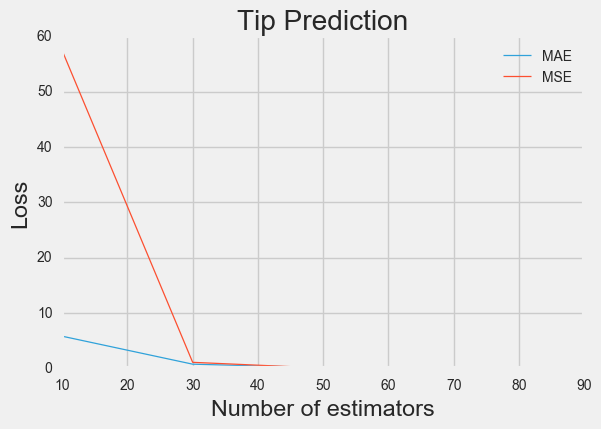

In [59]:
loss_mae, loss_mse = [], []
plot_name="Tip Prediction"
for est in range(10,100,20):
    print("Number of estimators: %d" % est)
    mae, mse = def_xgboost(estimators = est)
    print("MAE: ", mae)
    print("MSE: ", mse)
    loss_mae.append(mae)
    loss_mse.append(mse)
plot_performance(plot_name, loss_mae, loss_mse)

What do we can observe here?
* The best number of estimators is from 50
* We could predict the tip based on total amount.
* The model is not overfitted.

### <span style="color:#8b0000"> Visualization
 </span>

In this part I will show you some visualizations about New York and how the behavior of taxis is. I will make conclusions further.

In [60]:
# Ideas and pieces of code for this functiones were taken from: Albert van Breemen

# Defining the box to plot
def select_within_boundingbox(data, BB):
    return (data.Pickup_longitude >= BB[0]) & (data.Pickup_longitude <= BB[1]) & \
           (data.Pickup_latitude >= BB[2]) & (data.Pickup_latitude <= BB[3]) & \
           (data.Dropoff_longitude >= BB[0]) & (data.Dropoff_longitude <= BB[1]) & \
           (data.Dropoff_latitude >= BB[2]) & (data.Dropoff_latitude <= BB[3])
            
# Loading the image of NYC
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# Loading an image with zoom in NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [61]:
# Defining frame for visualization
data_box = data[select_within_boundingbox(data, BB)]

Now let's define a function to plot the behavior of taxis in NY.

In [62]:
# Ideas and pieces of code for this functiones were taken from: Albert van Breemen
# Function to plot dots on map
def plot_on_map(data_box, BB, nyc_map, s=10, alpha=0.2):
    plt.style.use('ggplot')
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(data_box.Pickup_longitude, data_box.Pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(data_box.Dropoff_longitude, data_box.Dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

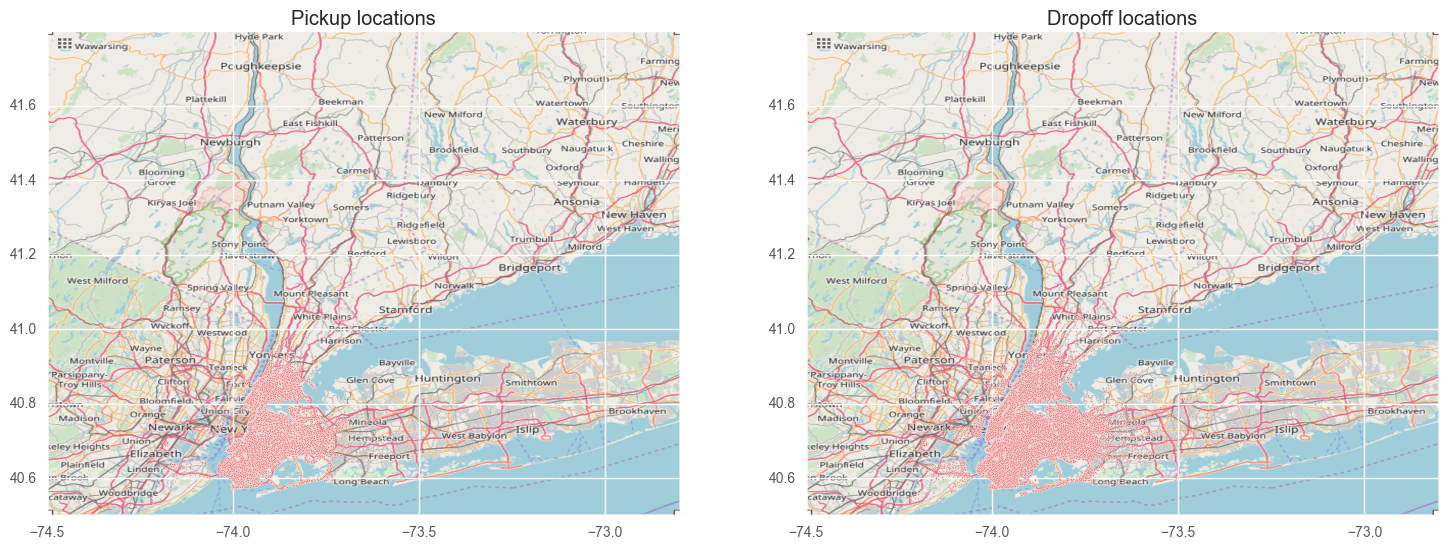

In [63]:
# Plotting the map with dots
plot_on_map(data_box, BB, nyc_map, s=1, alpha=0.5)

From this images we can observe some interesting things:
* From pickup locations, we can observe that most of people are picked up near to La Guardia and JFK Airport. 
* From pickup locations, we can observe that most of people are picked up around Manhatan.
* From dropoff locations, we observe that people is more distributed along New York. This is related with the total amoun payed from people who took a taxi near or inside the airport.

Now let's plot a <b>heat map</b> to visualize in another way the taxis behavior.

In [64]:
# Ideas and pieces of code for this functiones were taken from: Albert van Breemen
# Setting the number of bins and fitting in pickup and dropoff
n_lon, n_lat = 200, 200
density_pickup, density_dropoff = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon))

# Calculating the number of datapoint in the grid
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin

delta_lon = (BB[1]-BB[0]) / n_lon # bin longutide width
delta_lat = (BB[3]-BB[2]) / n_lat # bin latitude height

bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0]) / n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0]) / n_lat # bin height in miles

for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i * delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j * delta_lat
    
# Digitalization by pickup, dropoff given bins on longitude and latitude
inds_pickup_lon = np.digitize(data_box.Pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(data_box.Pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(data_box.Dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(data_box.Dropoff_latitude, bins_lat)

# Assign a point by grid bin
dxdy = bin_width_miles * bin_height_miles
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup[j, i] = np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==(n_lat-j))) / dxdy
        density_dropoff[j, i] = np.sum((inds_dropoff_lon==i+1) & (inds_dropoff_lat==(n_lat-j))) / dxdy

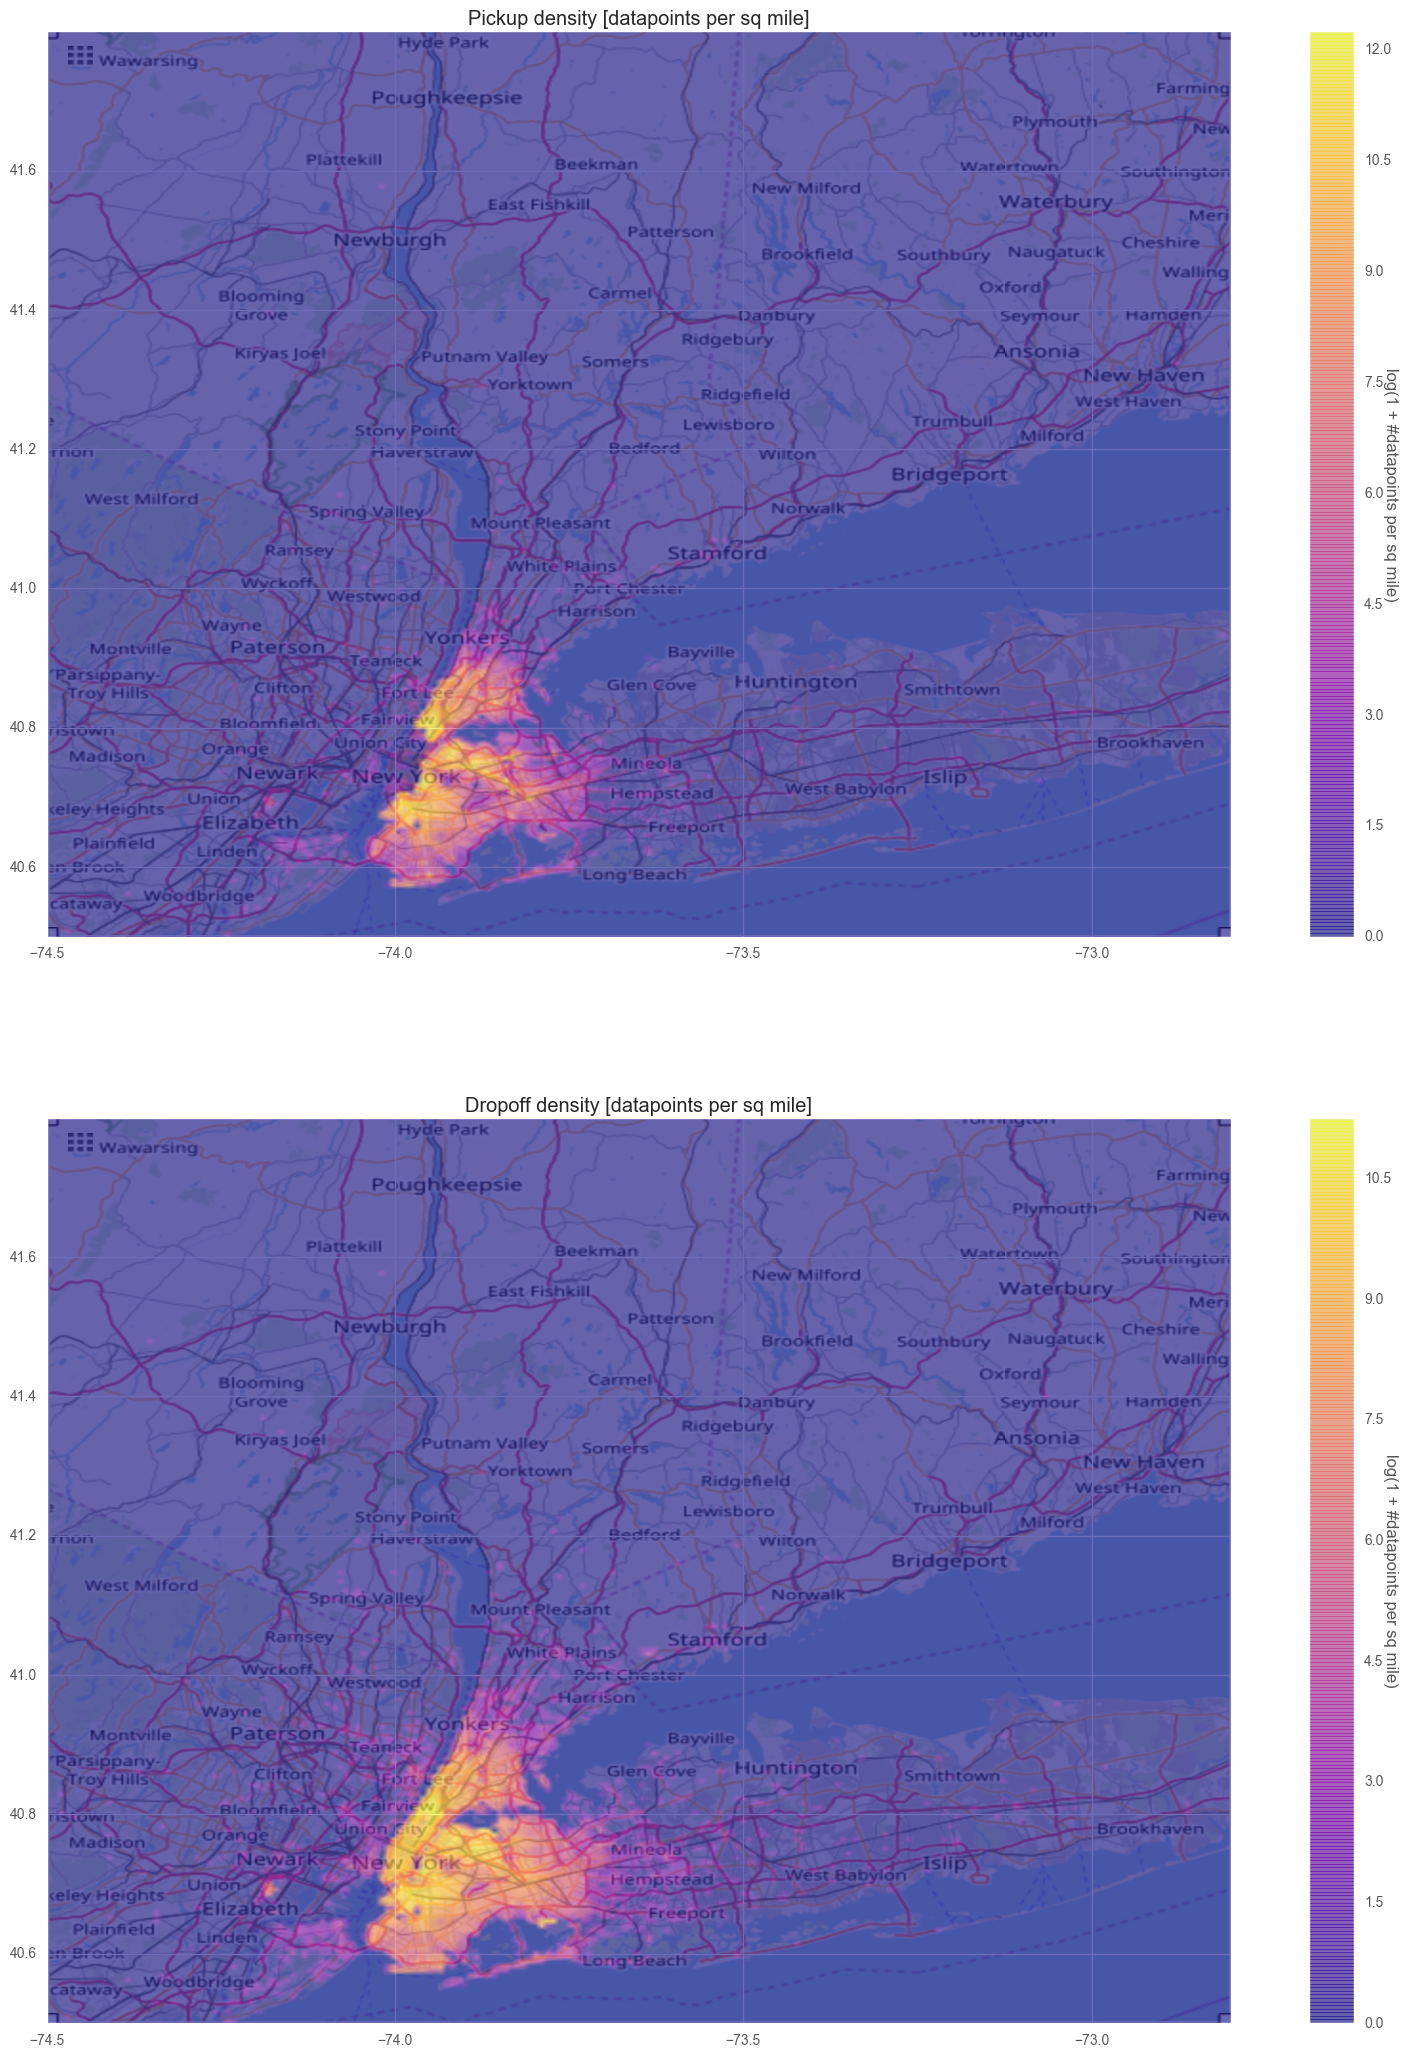

In [65]:
# Ideas and pieces of code for this functiones were taken from: Albert van Breemen
# Plot the density arrays
fig, axs = plt.subplots(2, 1, figsize=(18, 24))
axs[0].imshow(nyc_map, zorder=0, extent=BB);
im = axs[0].imshow(np.log1p(density_pickup), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[0].set_title('Pickup density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[0])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

axs[1].imshow(nyc_map, zorder=0, extent=BB);
im = axs[1].imshow(np.log1p(density_dropoff), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[1].set_title('Dropoff density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

As above, we can observe that most of the concurrency occur near Manhattan, Brooklyn and near to the La Guardia Airport.

# 4. Conclusions

I have developed a deep analysis of the dataset about <i>Green Taxis</i> in New York. We have seen that the use of this new alternative is becoming more popular, however it looks like it's a little bit expensive. However I think in a near future I will become more popular and cheeper.

<b>Further work</b>

* Make a deeper analysis focusing on anomalies, this is because there are some values which are so much weird in contrast with other values for example that so much people payed $0usd.
* Gather more data about the behavior of customers to know how their experience was and how this is related with maybe, the tip amount they give to the taxi driver.
* Apply new techniques as Recurrent Neural Networks or LSTM which are very useful in tasks like this.
* Apply new techniques of machine learning as Reinforcement Learning to predict tips or to predict how the behavior is of people arriving to distincts ariports.